# TP2 - Spatial Filtering
ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

Participants: Yueying CAO

# GOAL

In this lab we will practice the general principles of linear spatial filtering for 2D images:
- based on the convolution operation
- and applied with different filters to solve different tasks (denoising, highboost sharpening, border extraction)

Then, we will break some of the linear filtering assumptions:
- to create a bilinear filter,
- find Harris corners,
- and finding patterns in an image (Waldo/Charlie)


# 0. Preparation

* Define the path to the images only once. Then, use the given path for the images

* Handling several large images can create large memory demands. In order to avoid large size files that slow than processing, you can:
  - reuse the image variable names
  - clear large variables with the command
   ```reset_selective name_variable```

* If required resize the images while debugging (e.g. to 100x100)

* When submiting a jupyter notebook empty the outputs first: go to the Kernel menu, restart and clear output. 

* If you get some warnings "IOPub data rate exceeded" lauch your notebook with

  ```jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000```



### 0.1 Importing the required modules


In [17]:
import skimage.io as io
from skimage.transform import resize
from skimage.restoration import denoise_bilateral
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook and find all the images

In [2]:
# please make sure all the images folder are under a folder named 'images'
IMDIR = "./images/"         # Here, the default current location is the TP2 folder


### 0.3 Read and display the images
Check that you can read and display all the provided images. **Do not include this cell**, neither the code nor its ouput in the final report.


## 1 Spatial filtering with convolution

### 1.1. Mean Kernel Example
The following ``meanKernel'' function creates a smoothing kernel, which can be used with scipy's ``` ndimage.convolve(im,kernel) ```
convolution function to blur an image.

Run the following cells to display different versions of the kernel and the application of a mean_kernel on an image.



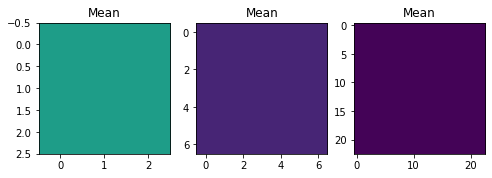

In [3]:
def meanKernel(hs):                     # hs here is half the window size
    kernel = np.zeros((hs*2+1,hs*2+1))
    kernel += 1/(hs*2+1)**2
    return kernel

width=8
height=3
plt.rcParams['figure.figsize'] = [width, height]

#creating and showing three mean kernels of different sizes
k = 1
for hs in [1,3,11]:
    plt.subplot(1,3,k)
    kernel = meanKernel(hs)
    plt.imshow(kernel, vmin=0, vmax=0.2)      # vmin and vmax range that the colormap
    plt.title('Mean')
    k+=1
plt.show()


Text(0.5, 1.0, 'Mean scipy conv')

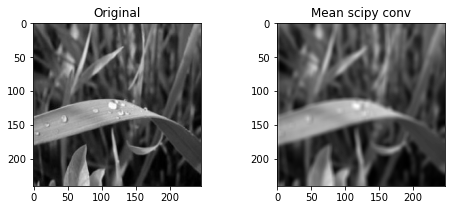

In [4]:
hs = 3
sigma = 2

im = io.imread('./images/smooth/grass.jpg', as_gray=True)  
kernel = meanKernel(hs)
im_filtered_scipy = ndimage.convolve(im,kernel)

plt.figure()
plt.subplot(1,2,1)        
plt.imshow(im, cmap = 'gray')
plt.title('Original')
        
plt.subplot(1,2,2)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Mean scipy conv')


### 1.2. Gaussian Kernel
Following the above example, create, display and apply several (at least 3) Gaussian kernels with varying window size and standard deviation. 

```Hints```:
- use the 'None' or 'Nearest' interpolation options of imshow to display the kernel images

In [5]:
#both versions work, pick the one you are more confortable with

# use meshgrid to create the kernel
def gaussianKernel(hs,sig): #half window size and Gaussian sigma
    kernel = np.zeros((hs*2+1,hs*2+1))
    ax = np.arange(-hs, hs+1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))
    return kernel / np.sum(kernel)      # normalization

import math
# define the kernel pixel-wise
def gaussianLambdaKernel(size,sigma): #full window size and Gaussian sigma
    kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

Text(0.5, 1.0, 'Gaussian with window 3 sigma 5')

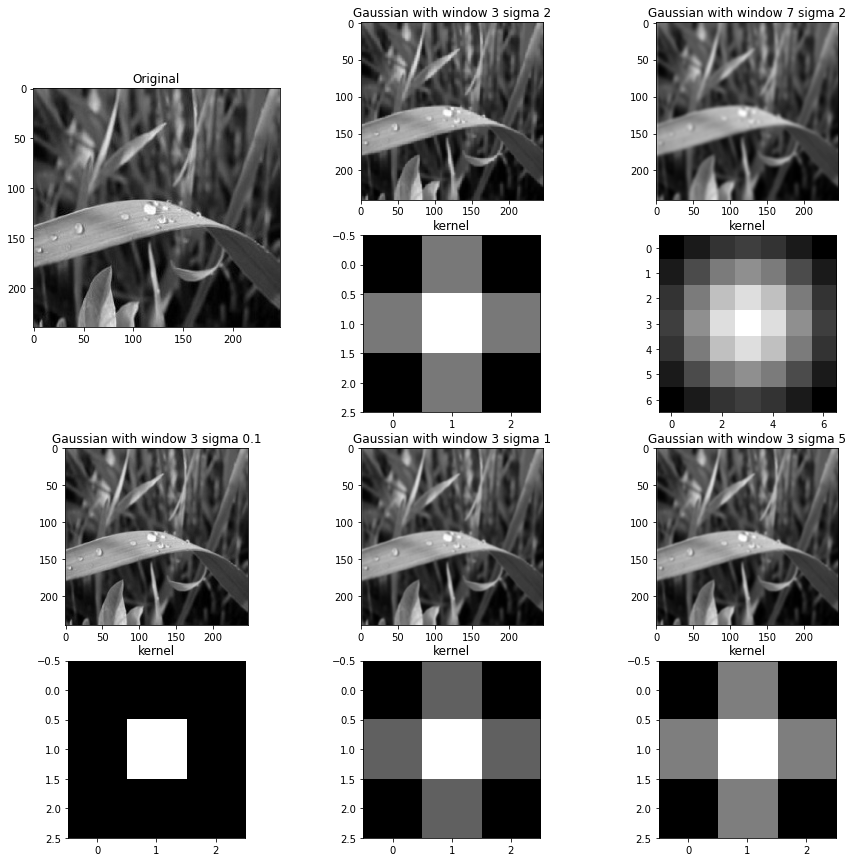

In [6]:
# keep using f variable above

width=15
height=15

plt.figure(figsize=(width, height))

plt.subplot(2,3,1)        
plt.imshow(im, cmap = 'gray')
plt.title('Original')

hs = 1
sigma = 2
kernel = gaussianKernel(hs, sigma)
plt.subplot(4,3,5)
plt.imshow(kernel, cmap = 'gray',interpolation= 'Nearest')
plt.title('kernel')
im_gaussian = ndimage.convolve(im,kernel)        
plt.subplot(4,3,2)
plt.imshow(im_gaussian, cmap = 'gray',interpolation= 'Nearest')
title = 'Gaussian with window '+str(hs*2+1)+' sigma '+ str(sigma)
plt.title(title)

hs = 3
sigma = 2
kernel = gaussianKernel(hs, sigma)
plt.subplot(4,3,6)
plt.imshow(kernel, cmap = 'gray',interpolation= 'Nearest')
plt.title('kernel')
im_gaussian = ndimage.convolve(im,kernel)        
plt.subplot(4,3,3)
plt.imshow(im_gaussian, cmap = 'gray')
title = 'Gaussian with window '+str(hs*2+1)+' sigma '+ str(sigma)
plt.title(title)

hs = 1
sigma = 0.1
kernel = gaussianKernel(hs, sigma)
plt.subplot(4,3,10)
plt.imshow(kernel, cmap = 'gray',interpolation= 'Nearest')
plt.title('kernel')
im_gaussian = ndimage.convolve(im,kernel)        
plt.subplot(4,3,7)
plt.imshow(im_gaussian, cmap = 'gray')
title = 'Gaussian with window '+str(hs*2+1)+' sigma '+ str(sigma)
plt.title(title)

hs = 1
sigma = 1
kernel = gaussianKernel(hs, sigma)
plt.subplot(4,3,11)
plt.imshow(kernel, cmap = 'gray',interpolation= 'Nearest')
plt.title('kernel')
im_gaussian = ndimage.convolve(im,kernel)        
plt.subplot(4,3,8)
plt.imshow(im_gaussian, cmap = 'gray')
title = 'Gaussian with window '+str(hs*2+1)+' sigma '+ str(sigma)
plt.title(title)

hs = 1
sigma = 5
kernel = gaussianKernel(hs, sigma)
plt.subplot(4,3,12)
plt.imshow(kernel, cmap = 'gray',interpolation= 'Nearest')
plt.title('kernel')
im_gaussian = ndimage.convolve(im,kernel)        
plt.subplot(4,3,9)
plt.imshow(im_gaussian, cmap = 'gray')
title = 'Gaussian with window '+str(hs*2+1)+' sigma '+ str(sigma)
plt.title(title)

### 1.3 Filtering with your own Convolution
**a)** Repeat the smoothing above with your own implementation of the ```convolution``` function. The function should receive as input an image and a filter kernel (matrix of weights) and return the filtered image. Compare your results with those from the scikit in-built function.

**b)** Apply a Gaussian filter with fixed parameters to 3 of the images in the ``smooth`` folder and display side by side the results of your convolution vs. those of the in-built function to check your implementation is correct. Clearly state on the title of the image which version of the convolution function is being used.


**c)** **Write down your findings**, notably the reasons for any possible difference with the in-built implementation. 

**d)** Why and how can the convolution can be written as a matrix multiplication? why is it interesting?
```Hint```:  see http://cs231n.github.io/convolutional-networks/

In [7]:
def myConvolution(img, kernel):
    # first, rotate the kernel
    kernel_rota = np.copy(kernel)
    kernel_rota = kernel.reshape((1, kernel.size))[0][::-1]
    kernel_rota = kernel_rota.reshape((kernel.shape[0], kernel.shape[0]))
    
    # then, zero-padding the input image
    hs = int((kernel.shape[0]-1)/2)                   # half the window size
    pad = np.pad(img, (hs, hs))
    conv = np.copy(pad)                               # for a variable is not immutable, need to use 'copy'!!!!!!!!!!!!!! 
    for i in range(hs, hs+img.shape[0]):
        for j in range(hs, hs+img.shape[0]):
            temp = pad[(i-hs):(i+hs+1), (j-hs):(j+hs+1)]
            temp = np.multiply(temp, kernel_rota)
            conv[i,j] = float(np.sum(temp))
            
    return conv[hs:hs+img.shape[0], hs:hs+img.shape[0]]

check the computation by viewing a random pixel value
convolution using scipy function, [25,46] pixel value is :  0.3389758061362541
convolution using my function, [25,46] pixel value is :  0.33897580613625405


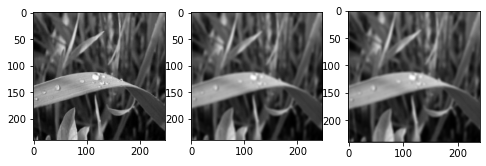

In [8]:
# a) Compare your results with those from the scikit in-built function.
hs = 2
sigma = 3
kernel = gaussianKernel(hs, sigma)

plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')

plt.subplot(1,3,2)
im_conv_scipy = ndimage.convolve(im,kernel)
plt.imshow(im_conv_scipy, cmap='gray')
print('check the computation by viewing a random pixel value')
print('convolution using scipy function, [25,46] pixel value is : ', im_conv_scipy[25,46])

plt.subplot(1,3,3)
im_myconv = myConvolution(im, kernel)
plt.imshow(im_myconv, cmap='gray')
print('convolution using my function, [25,46] pixel value is : ', im_myconv[25,46])

convolution using scipy function, [25,46] pixel value is :  0.4539700157011756
convolution using my function, [25,46] pixel value is :  0.4539700157011755
convolution using scipy function, [25,46] pixel value is :  0.3051191117252553
convolution using my function, [25,46] pixel value is :  0.3051191117252553
convolution using scipy function, [25,46] pixel value is :  0.023133220943775974
convolution using my function, [25,46] pixel value is :  0.023133220943775977


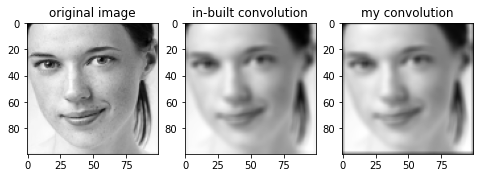

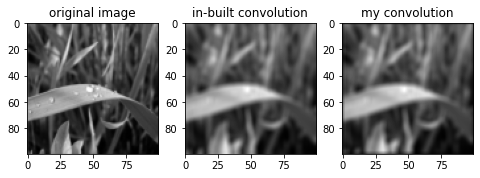

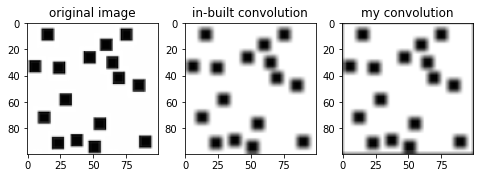

In [9]:
hs = 2
sigma = 3
kernel = gaussianKernel(hs, sigma)

SUBDIR = os.path.join(IMDIR, "smooth")

for root, dirnames, filenames in os.walk(SUBDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')
            
            plt.figure()
            plt.subplot(1,3,1)
            plt.imshow(im, cmap='gray')
            plt.title('original image')
            
            plt.subplot(1,3,2)
            im_conv_scipy = ndimage.convolve(im,kernel)
            plt.imshow(im_conv_scipy, cmap='gray')
            plt.title('in-built convolution')
            
            plt.subplot(1,3,3)
            im_myconv = myConvolution(im, kernel)
            plt.imshow(im_myconv, cmap='gray')
            plt.title('my convolution')
    
            print('convolution using scipy function, [25,46] pixel value is : ', im_conv_scipy[25,46])

            print('convolution using my function, [25,46] pixel value is : ', im_myconv[25,46])

## 2. Bilateral Filter

**a)** Implement your own version of the ``bilateral`` filter and compare its results vs. scikit ``denoise_bilateral`` function. 

**b)** Compare the results versus the mean and gaussian filter for one group of images of the ``einstein`` folder. Show the results visually and using the PSNR 



Hint:  Groups:

-the gaussian-m**.tif images

-the speckle-m**.tif images

-the blur, contrast, impulse (salt and pepper noise) and jpeg (jpeg compressed) images



In [18]:
im_filtered_scipy = denoise_bilateral(im, win_size=hs*2+1, sigma_color=0.05, sigma_spatial=15)

In [19]:
def my_bilateral(img, hs=3, sigma_color=0.05, sigma_spatial=15):                # remined, hs is the half size of the window
    pad = np.pad(img, (hs, hs))
    bilat = np.zeros((pad.shape[0], pad.shape[0]))
    
    # compute spatial kernel which similar to gaussian kernel and is fixed
    spatial_ker = np.zeros((hs*2+1,hs*2+1))
    ax = np.arange(-hs, hs+1)
    xx, yy = np.meshgrid(ax, ax)
    spatial_ker = np.exp(-(xx**2 + yy**2) / (2.*sigma_spatial**2))
    
    for i in range(hs, hs+img.shape[0]):
        for j in range(hs, hs+img.shape[0]):
            temp = pad[(i-hs):(i+hs+1), (j-hs):(j+hs+1)]
            
            # compute color kernel which
            color_ker = temp.reshape((1, temp.size))
            color_ker = [(color_ker[0][i]-color_ker[0][int((temp.size-1)/2)])**2 for i in range(temp.size)]
            color_ker = (np.asarray(color_ker)).reshape((temp.shape[0], temp.shape[0]))
            color_ker = np.exp(-color_ker/(2.*sigma_color**2))
            
            ker = np.multiply(spatial_ker, color_ker)
            ker = ker/np.sum(ker)            # normalization
            temp = np.multiply(temp, ker)
            bilat[i,j] = float(np.sum(temp))
            
    return bilat[hs:hs+img.shape[0], hs:hs+img.shape[0]]

check the computation by viewing a random pixel value
convolution using scipy function, [35,46] pixel value is :  0.9968491442588014
0.8613991724660301
convolution using my function, [35,46] pixel value is :  0.9968688378217119
0.8612211049575024


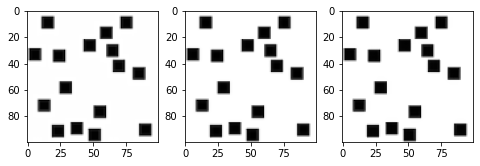

In [20]:
# a) Implement your own version of the bilateral filter and compare its results vs. scikit denoise_bilateral function.
hs = 3
sig_color=0.05
sig_spatial=15

plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')

plt.subplot(1,3,2)
im_biscipy = denoise_bilateral(im, win_size=hs, sigma_color=sig_color, sigma_spatial=sig_spatial)
plt.imshow(im_biscipy, cmap='gray')
print('check the computation by viewing a random pixel value')
print('convolution using scipy function, [35,46] pixel value is : ', im_biscipy[35,46])
print(np.mean(im_biscipy))

plt.subplot(1,3,3)
im_mybi = my_bilateral(im, hs=hs, sigma_color=sig_color, sigma_spatial=sig_spatial)
plt.imshow(im_mybi, cmap='gray')
print('convolution using my function, [35,46] pixel value is : ', im_mybi[35,46])
print(np.mean(im_mybi))

In [21]:
# compute the Peak SNR
def PSNR(img, img_noise):
    # need to normalize img at first, if it's not normalized between [0,1]
    if img.max() > 1:
        img = (img-img.min())/(img.max()-img.min())

    mse = np.mean((img/1.0 - img_noise/1.0) ** 2)
    if(mse == 0):  # MSE is zero when the noise is not in the signal
        return 100
    
    # compute the possible maximum pixel value
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / (mse**0.5))
    return psnr

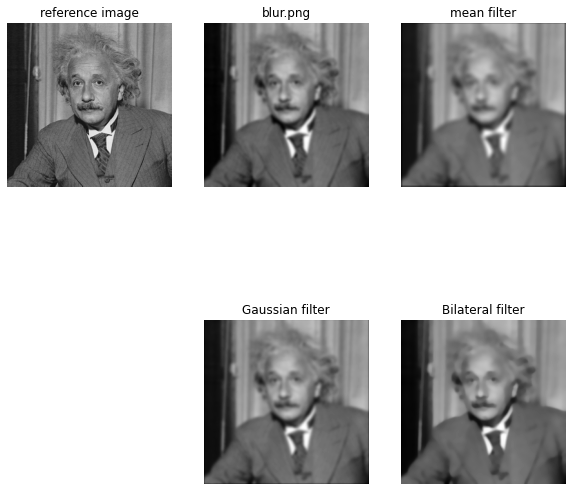

the PSNR between  blur.png  and reference is 26.55
the PSNR between mean filter result and reference is 23.78
the PSNR between Gaussian filter result and reference is 25.55
the PSNR between Bilateral filter result and reference is 26.06


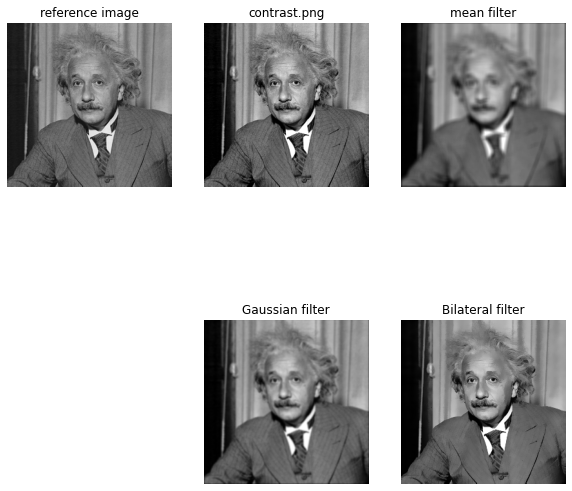

the PSNR between  contrast.png  and reference is 26.54
the PSNR between mean filter result and reference is 23.13
the PSNR between Gaussian filter result and reference is 25.60
the PSNR between Bilateral filter result and reference is 26.54


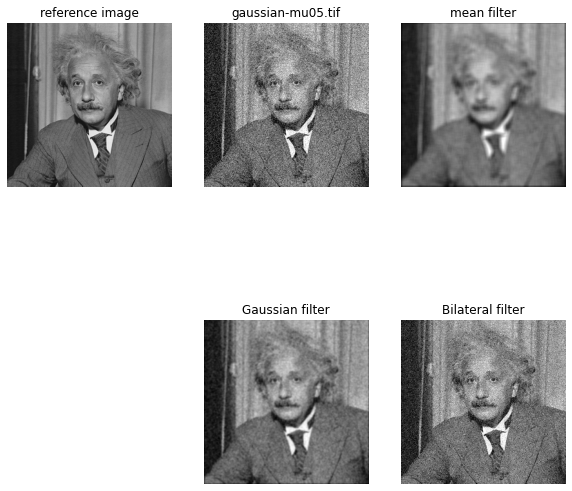

the PSNR between  gaussian-mu05.tif  and reference is 19.08
the PSNR between mean filter result and reference is 22.17
the PSNR between Gaussian filter result and reference is 23.57
the PSNR between Bilateral filter result and reference is 20.05


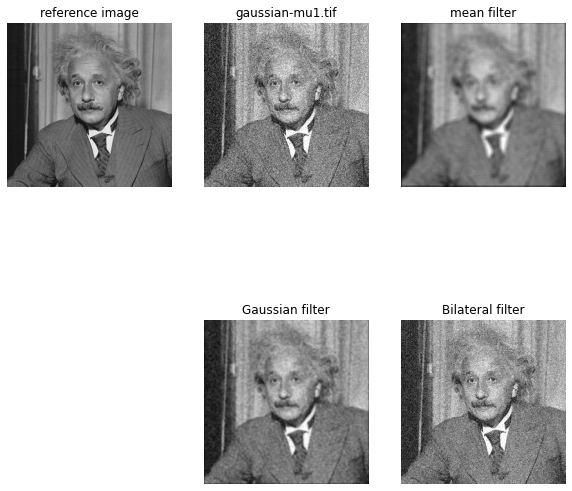

the PSNR between  gaussian-mu1.tif  and reference is 17.06
the PSNR between mean filter result and reference is 18.89
the PSNR between Gaussian filter result and reference is 19.40
the PSNR between Bilateral filter result and reference is 17.65


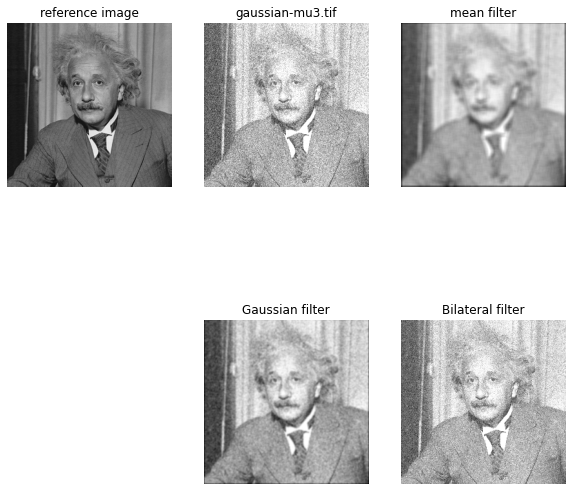

the PSNR between  gaussian-mu3.tif  and reference is 10.13
the PSNR between mean filter result and reference is 10.56
the PSNR between Gaussian filter result and reference is 10.55
the PSNR between Bilateral filter result and reference is 10.23


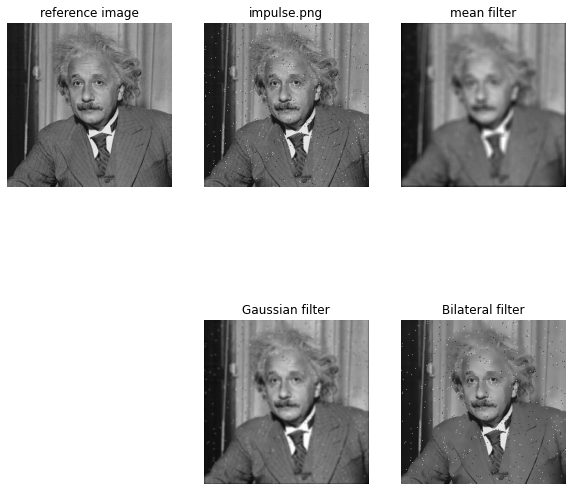

the PSNR between  impulse.png  and reference is 26.55
the PSNR between mean filter result and reference is 24.23
the PSNR between Gaussian filter result and reference is 28.38
the PSNR between Bilateral filter result and reference is 26.06


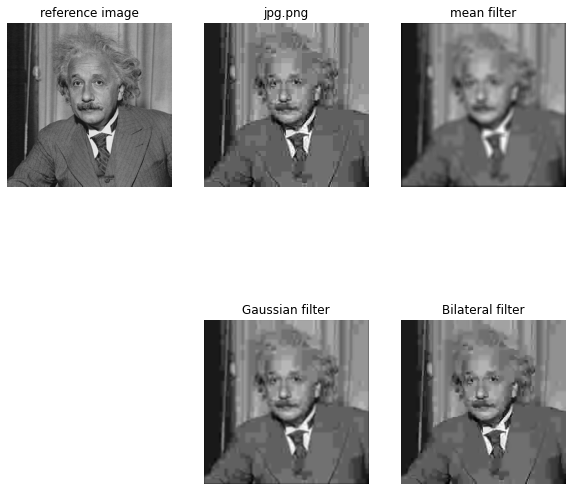

the PSNR between  jpg.png  and reference is 26.61
the PSNR between mean filter result and reference is 24.00
the PSNR between Gaussian filter result and reference is 26.51
the PSNR between Bilateral filter result and reference is 27.15


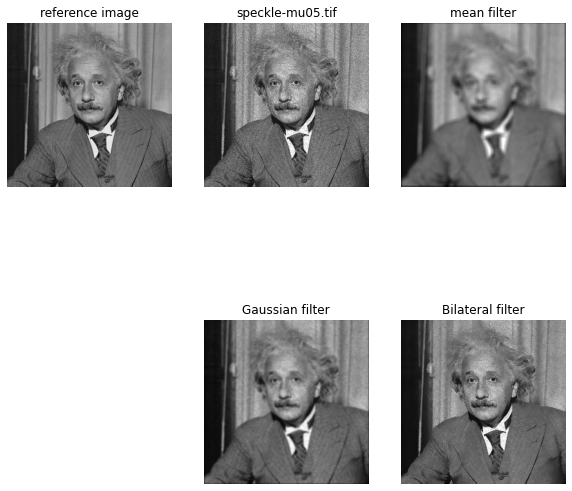

the PSNR between  speckle-mu05.tif  and reference is 26.36
the PSNR between mean filter result and reference is 24.01
the PSNR between Gaussian filter result and reference is 27.64
the PSNR between Bilateral filter result and reference is 28.49


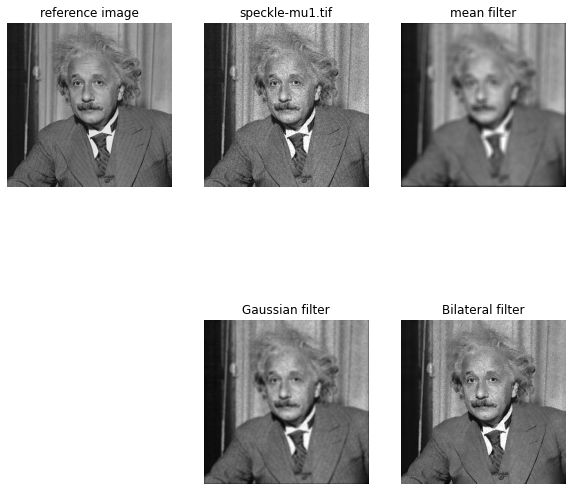

the PSNR between  speckle-mu1.tif  and reference is 24.31
the PSNR between mean filter result and reference is 22.94
the PSNR between Gaussian filter result and reference is 25.29
the PSNR between Bilateral filter result and reference is 25.56


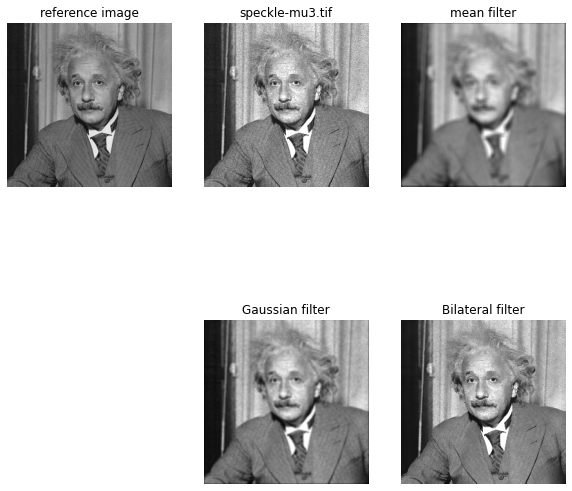

the PSNR between  speckle-mu3.tif  and reference is 17.42
the PSNR between mean filter result and reference is 17.41
the PSNR between Gaussian filter result and reference is 17.80
the PSNR between Bilateral filter result and reference is 17.68


In [42]:
SUBDIR = os.path.join(IMDIR,'einstein/')
refer_path = os.path.join(IMDIR,'einstein/einstein.png')
refer = io.imread(refer_path, as_gray=True)

width=10
height=10
plt.rcParams['figure.figsize']=[width, height]


hs = 3         # half window size
sig_color = 0.05
sig_spatial = 15
sig_gaussian = 1

if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')) and (filename != 'einstein.png'):   
                # read the image 
                im = io.imread(f,as_gray=True)
                
                # create a figure for each image
                plt.figure()
                # plot the original image and processed images
                plt.subplot(2,3,1)
                plt.imshow(refer, cmap='gray')
                plt.title('reference image')
                plt.axis("off")
                
                plt.subplot(2,3,2)
                plt.imshow(im, cmap='gray')
                plt.title(filename)
                plt.axis("off")
                
                plt.subplot(2,3,3)
                kernel = meanKernel(hs)
                im_mean = myConvolution(im,kernel)
                plt.imshow(im_mean, cmap='gray')
                plt.title('mean filter')
                plt.axis("off")
                
                
                plt.subplot(2,3,5)
                kernel = gaussianKernel(hs, sig_gaussian)
                im_gauss = myConvolution(im,kernel)
                plt.imshow(im_gauss, cmap='gray')
                plt.title('Gaussian filter')
                plt.axis("off")
                
                plt.subplot(2,3,6)
                im_bilateral = my_bilateral(im, hs=hs, sigma_color=sig_color, sigma_spatial=sig_spatial)
                plt.imshow(im_bilateral, cmap='gray')
                plt.title('Bilateral filter')
                plt.axis("off")

                plt.show()
                
                
                # compare PSNR
                psnr = PSNR(refer, im)
                print('the PSNR between ',filename, ' and reference is {:.2f}'.format(psnr))
                psnr = PSNR(refer, im_mean)
                print('the PSNR between mean filter result and reference is {:.2f}'.format(psnr))
                psnr = PSNR(refer, im_gauss)
                print('the PSNR between Gaussian filter result and reference is {:.2f}'.format(psnr))
                psnr = PSNR(refer, im_bilateral)
                print('the PSNR between Bilateral filter result and reference is {:.2f}'.format(psnr))
                


## 3. Derivative filters and Harris

3.1 Create a function that generates the kernels required to compute the *image gradient* in the x and in the y direction

3.2. Show the gradient images and the *gradient magnitude* for an image of the 'harris' folder

3.2. Implement the Harris corner detector and apply it to an image of the 'harris' folder or an image of your own with corner content (building, rubik's cube, etc). Follow the algorithm steps from the lecture

**a)** What is the influence of the k parameter?
**b)** What is the Gaussian pre-filtering important?
**c)** Threshold the R map to find the detected corners. 
**b)** Display the score map (R) and the detected corners overlaid over the image 


In [23]:
# create a funcction that generates the kernels required to compute the image gradient in x and y direction
def xy_gradient_fillter():
    # Sobel filters
    grad_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    grad_y = np.transpose(grad_x)
    return grad_x, grad_y

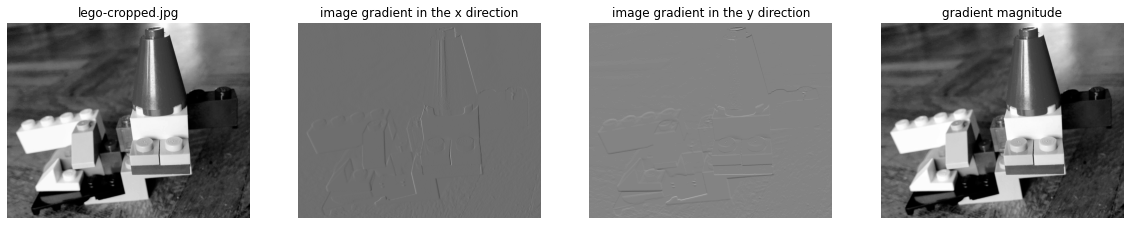

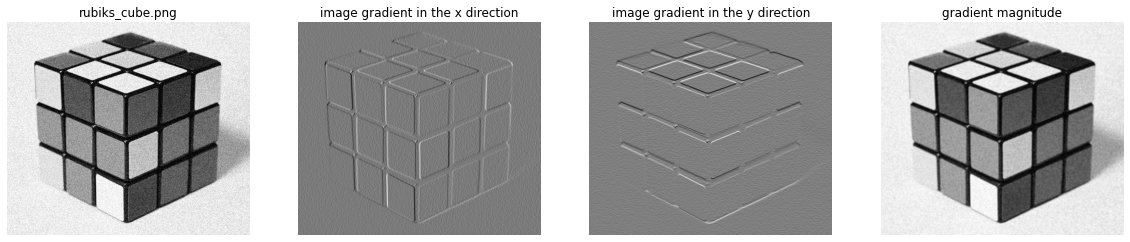

In [25]:
# Show the gradient images and the gradient magnitude for an image of the 'harris' folder
SUBDIR = os.path.join(IMDIR,'harris/')

width=20
height=20
plt.rcParams['figure.figsize']=[width, height]

sobel_x, sobel_y = xy_gradient_fillter()
mag = np.sqrt(sobel_x**2+sobel_y**2)

if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):   
                # read the image 
                im = io.imread(f,as_gray=True)
                plt.figure()
                plt.subplot(1,4,1)
                plt.imshow(im, cmap='gray')
                plt.axis('off')
                plt.title(filename)
                
                plt.subplot(1,4,2)
                grad_x_im = ndimage.convolve(im,sobel_x)
                plt.imshow(grad_x_im, cmap='gray')
                plt.axis('off')
                plt.title('image gradient in the x direction')
                
                plt.subplot(1,4,3)
                grad_y_im = ndimage.convolve(im,sobel_y)
                plt.imshow(grad_y_im, cmap='gray')
                plt.axis('off')
                plt.title('image gradient in the y direction')
                
                plt.subplot(1,4,4)
                mag_im = ndimage.convolve(im,mag)
                plt.imshow(mag_im, cmap='gray')
                plt.axis('off')
                plt.title('gradient magnitude')
                

In [67]:
# Implement the Harris corner detector
def NMS(Mat, hs):             # Non-Maximum Suppression,NMS
    mat = np.copy(Mat)
    for i in range(hs, Mat.shape[0]-hs):
        for j in range(hs, Mat.shape[1]-hs):
            
            # Use hs*hs window, less than the center pixel set to zero   
            for k in range(i-hs,i+hs):
                for l in range(j-hs,j+hs):
                    if (Mat[k,l]<=Mat[i,j] and k!=i and l!=j and Mat[k,l]>0):
                        mat[i,j] = 0
    return mat

def harris_detec(img, k=0.05, threshold=0.3, hs=1, sigma=1):
    # step1: compute the derivatives
    sobel_x, sobel_y = xy_gradient_fillter()
    grad_x = ndimage.convolve(img,sobel_x)
    grad_y = ndimage.convolve(img,sobel_y)
    
    # step2: outer product
    grad_xx = grad_x*grad_x
    grad_yy = grad_y*grad_y
    grad_xy = grad_x*grad_y
    
    # step3: convolve each of these images with a Gaussian
    kernel = gaussianKernel(hs, sigma)
    grad_xx = ndimage.convolve(grad_xx, kernel)
    grad_yy = ndimage.convolve(grad_yy, kernel)
    grad_xy = ndimage.convolve(grad_xy, kernel)
    
    # step4: compute "good to track" score based on the eigenvalues of the autocorrelation matrix.
    pad_xx = np.pad(grad_xx, (hs, hs))
    pad_yy = np.pad(grad_yy, (hs, hs))
    pad_xy = np.pad(grad_xy, (hs, hs))
    
    R = np.zeros((pad_xx.shape[0], pad_xx.shape[1]))
    corners = np.zeros((img.shape[0],img.shape[1]))
    for i in range(hs, img.shape[0]+hs):    # 
        for j in range(hs, img.shape[1]+hs):
            # the Harris matrix M=[a, c; c, b]
            # a = Ix^2
            # b = Iy^2
            # c = Ix*Iy
            a = pad_xx[i,j]
            b = pad_yy[i,j]
            c = pad_xy[i,j]
            
            # compute the score
            R[i,j] = a*b - c**2 - k*((a+b)**2)
            
    R = R[hs:img.shape[0]+hs, hs:img.shape[1]+hs]
    R_NMS = NMS(R, 1)
    R = (R-R.min())/(R.max()-R.min())           # normalization    
        
    # store the index of corners
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R_NMS[i,j] > threshold:
                corners[i,j]=1
    return R_NMS,R, corners
            

(-0.5, 512.5, 448.5, -0.5)

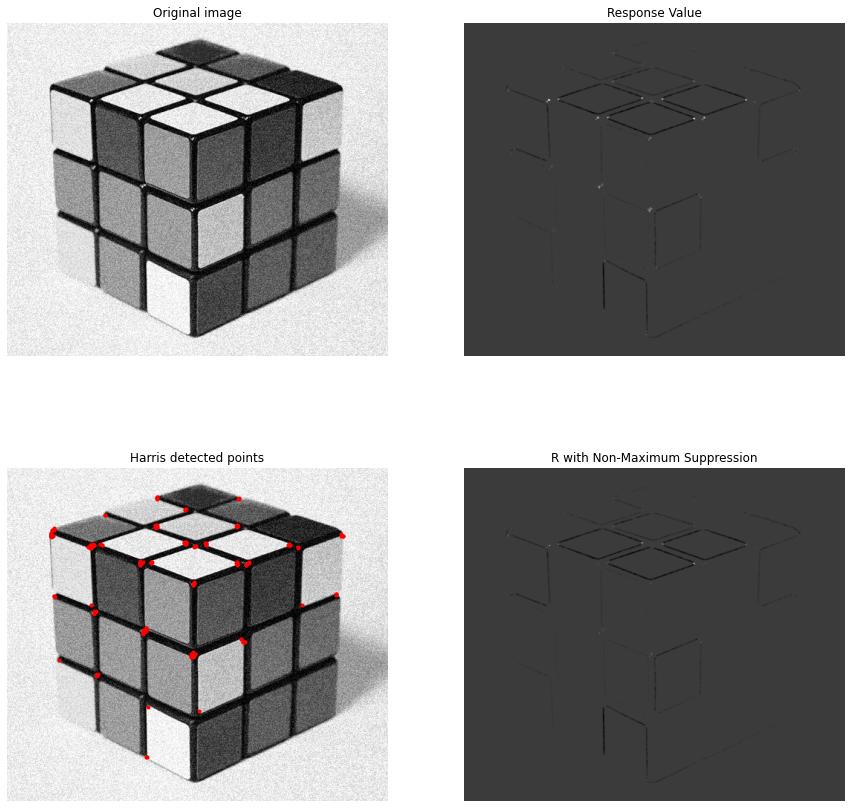

In [72]:
IMPATH = os.path.join(IMDIR,'harris/rubiks_cube.png')

width=15
height=15
plt.rcParams['figure.figsize']=[width, height]
plt.figure()
plt.subplot(2,2,1)
img = io.imread(IMPATH,as_gray=True)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')

R_NMS, R, corners = harris_detec(img, 0.05)
plt.subplot(2,2,2)
plt.imshow(R, cmap='gray')
plt.title('Response Value')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(R_NMS, cmap='gray')
plt.title('R with Non-Maximum Suppression')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img, cmap='gray')
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j]:
            plt.scatter(j,i, color='r', marker='.')
plt.title('Harris detected points')
plt.axis('off')


(-0.5, 512.5, 448.5, -0.5)

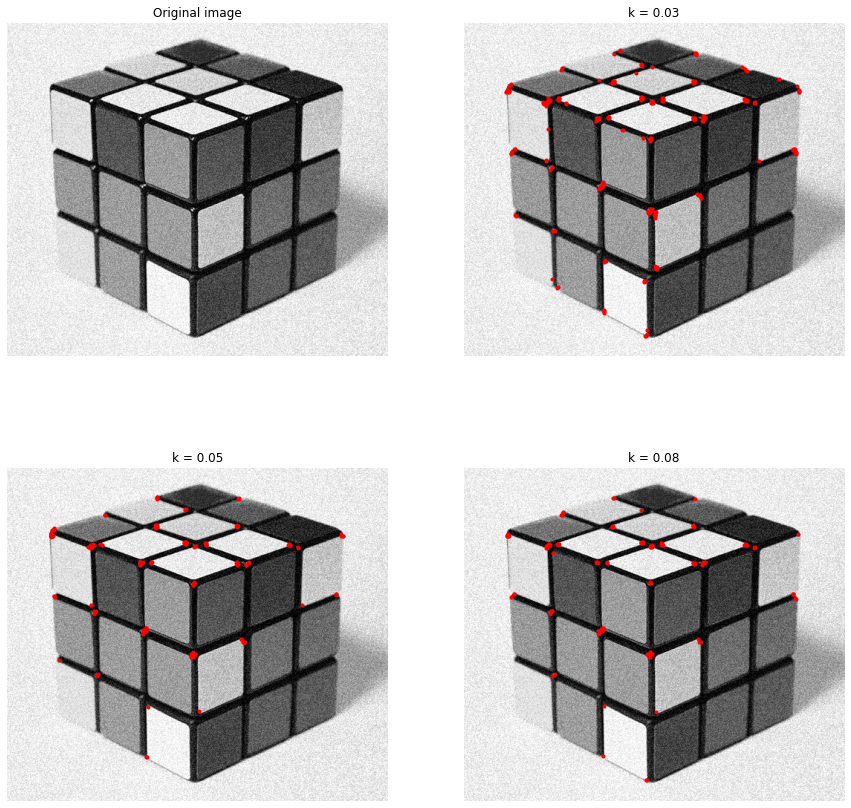

In [75]:
# the influence of the k parameter

width=15
height=15
plt.rcParams['figure.figsize']=[width, height]

plt.figure()
plt.subplot(2,2,1)
img = io.imread(IMPATH,as_gray=True)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')

R_NMS, R, corners = harris_detec(img, 0.02)
plt.subplot(2,2,2)
plt.imshow(img, cmap='gray')
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j]:
            plt.scatter(j,i, color='r', marker='.')
plt.title('k = 0.03')
plt.axis('off')

R_NMS, R, corners = harris_detec(img, 0.05)
plt.subplot(2,2,3)
plt.imshow(img, cmap='gray')
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j]:
            plt.scatter(j,i, color='r', marker='.')
plt.title('k = 0.05')
plt.axis('off')

R_NMS, R, corners = harris_detec(img, 0.09)
plt.subplot(2,2,4)
plt.imshow(img, cmap='gray')
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j]:
            plt.scatter(j,i, color='r', marker='.')
plt.title('k = 0.08')
plt.axis('off')

## 4. Find Waldo (Charlie): template matching

Use patch-wise Normalized Cross Correlation (NCC) to automatically find Waldo (Charlie) in an image. To this end, look for the template image (``charlie-template``) inside ``marche-crop`` or the ``marche`` images. As the process can be long start with the cropped version, you might also find it useful to create a separate notebook for this task only. Evaluate the NCC expression from the slides (non-local means) to compare the template with every location in the target image, store the results and retrieve the location with the highest NCC score. Draw this location on the target image.

**Describe the process assumptions and limitations**

see another notebook